In [30]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


Importing necessary modules.

In [31]:
import pandas as pd
import squarify 
import cartopy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cartopy.crs as ccrs

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [32]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (18, 10)

In [33]:
df = pd.read_csv('../input/gtd/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
print('Dataframe contains {} rows and  {} columns'.format(df.shape[0], df.shape[1]))

Dataframe contains 181691 rows and  135 columns


In [35]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [37]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','natlty1_txt': 'Nationality',
                       'region_txt':'Region','provstate':'State','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [38]:
df = df[['eventid','Year','Month','Day','Country','State','Region','Nationality','city','latitude','longitude','AttackType','Killed',
         'Wounded','Target','Group','success','Target_type','Weapon_type','Motive']]
df.head()

,eventid,Year,Month,Day,Country,State,Region,Nationality,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,1,Private Citizens & Property,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Belgium,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,1,Government (Diplomatic),Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,United States,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,1,Journalists & Media,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,United States,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,1,Government (Diplomatic),Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,United States,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,1,Government (Diplomatic),Incendiary,NaN


# *Plots by Year, Country, and Target Type : 30 largest values.*

In [39]:
cols_to_plot = ['Year', 'Target_type', 'city', 'Region']

In [40]:
def group_and_plot(col):
    colors = ['teal', 'steelblue', 'mediumseagreen', 'purple', 'midnightblue', 'indigo', 'royalblue', 'darkmagenta']
    a = df.groupby(col,as_index = True, group_keys = False)['eventid'].count()
    plt.title(col, weight='bold', fontsize = 20)
    a.nlargest(30).plot(kind = 'bar', color = random.choice(colors))
    

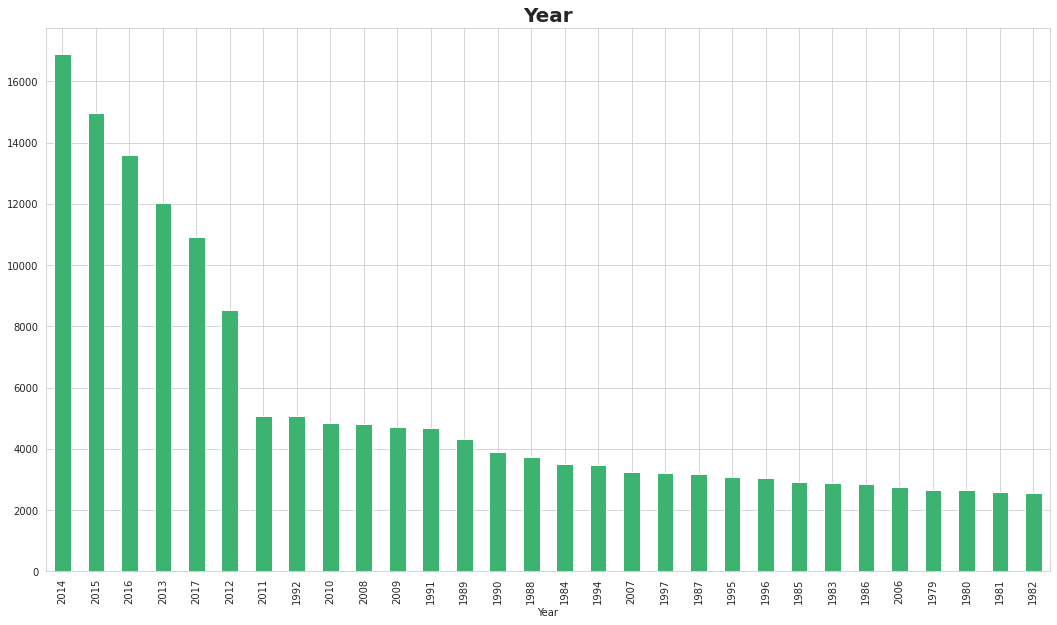

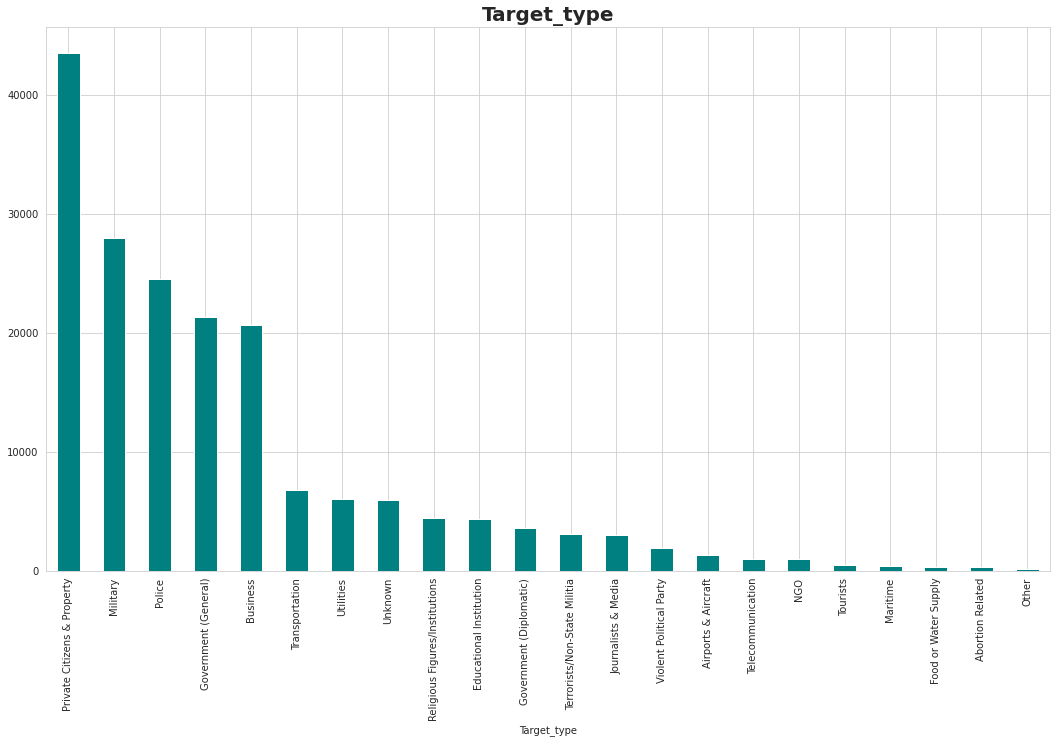

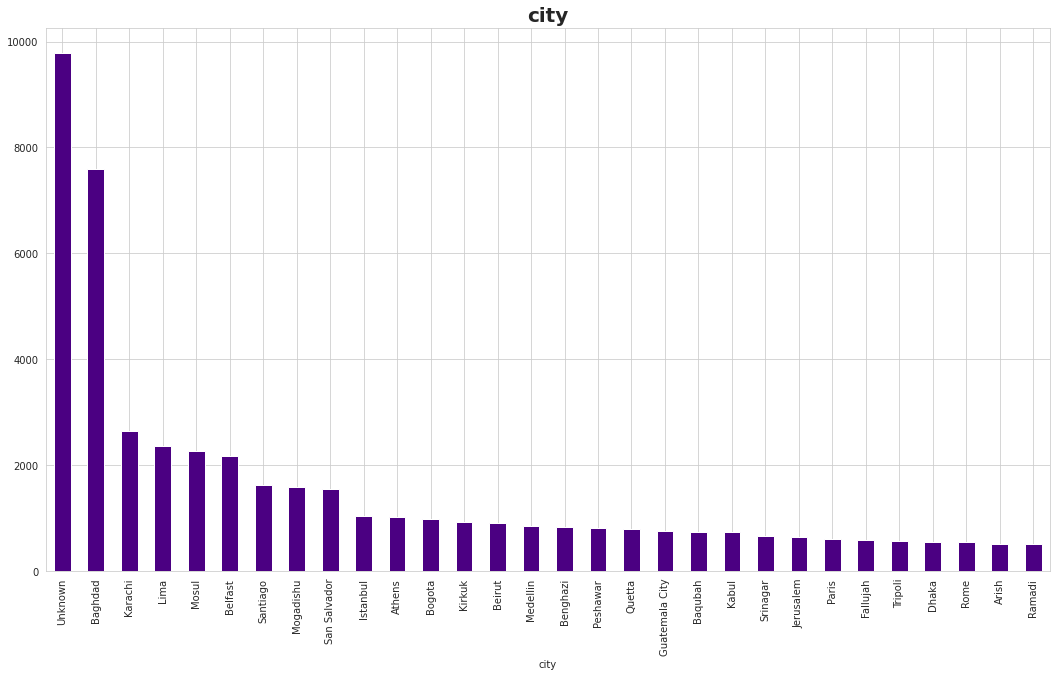

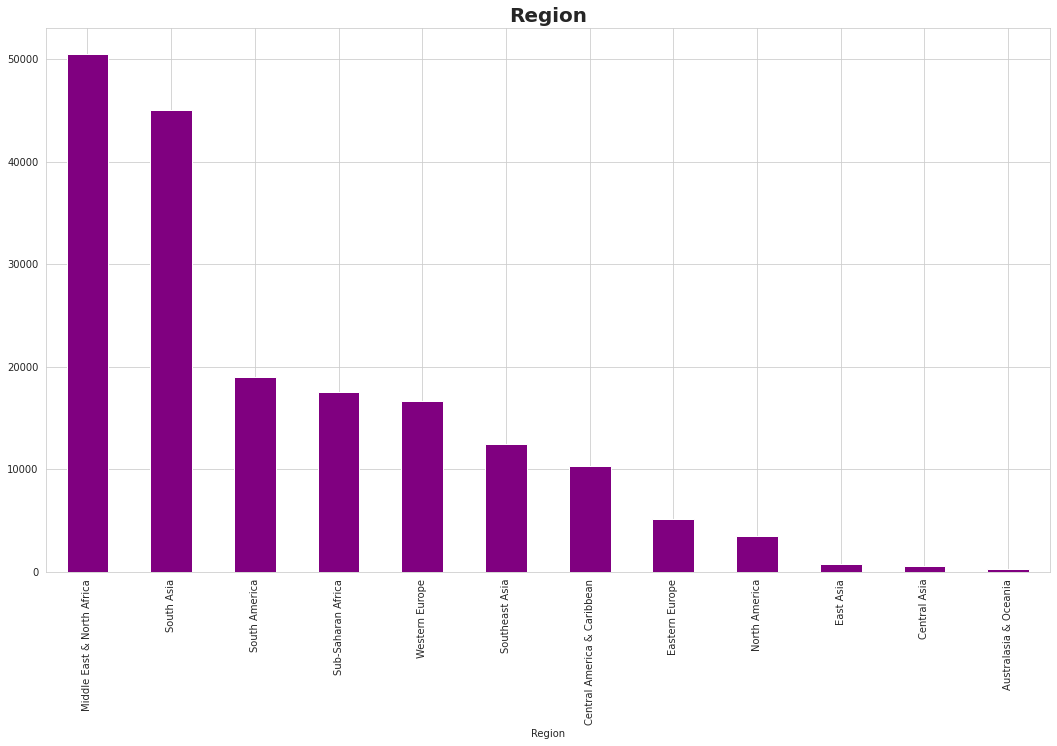

In [41]:
for col in cols_to_plot:
    group_and_plot(col)
    plt.show()
    print('====================================================================================================================================================')

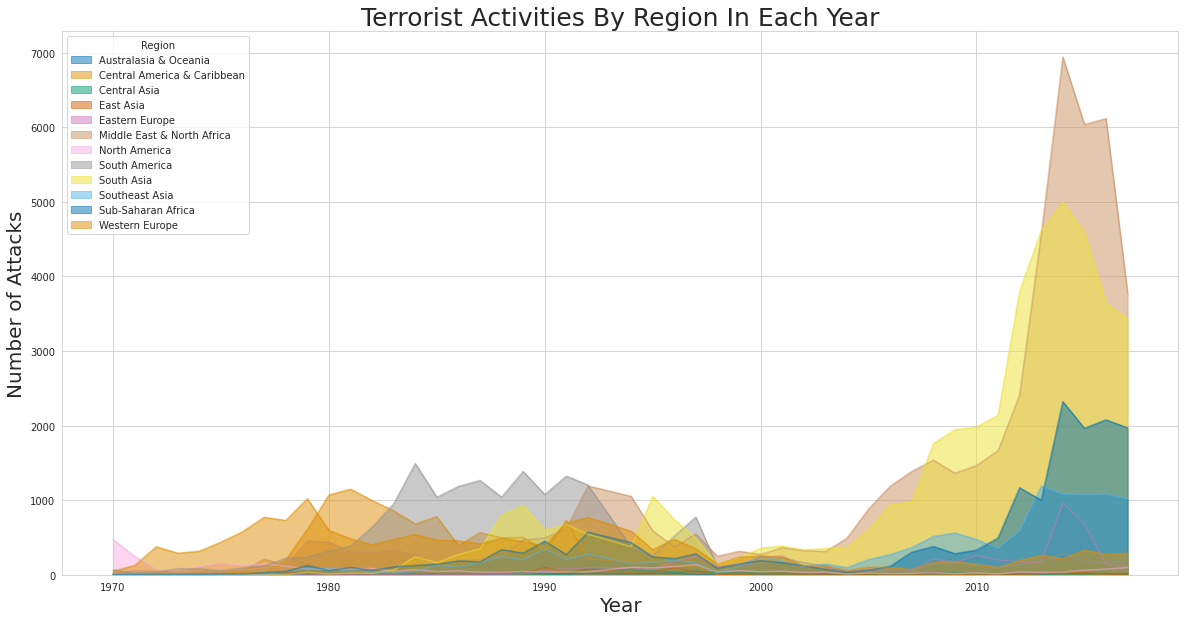

In [42]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

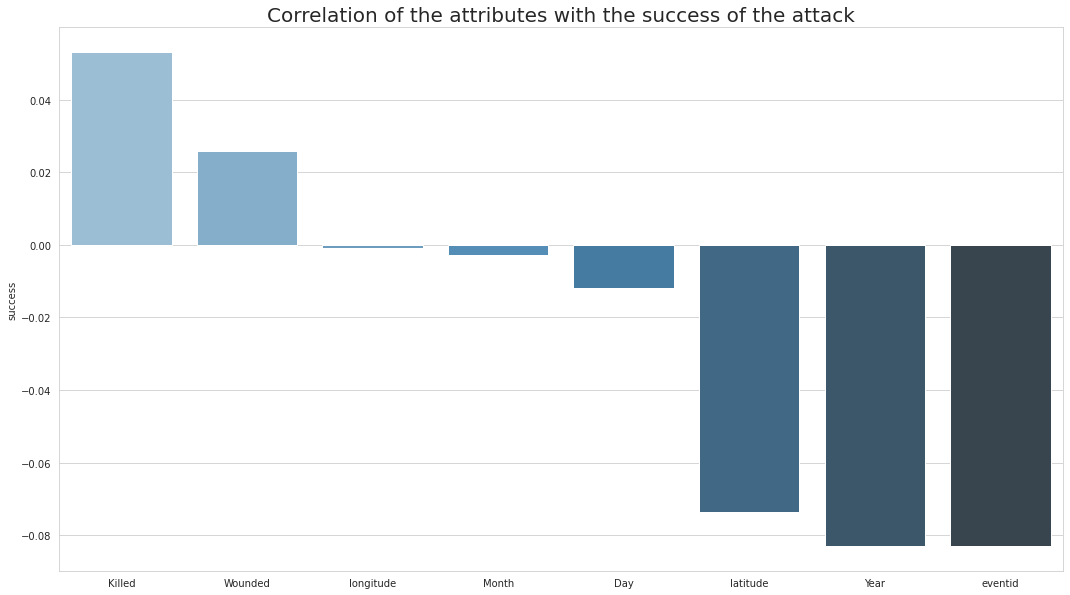

In [43]:
corr_df = df.corr()['success'].sort_values(ascending = False)[1:]
sns.barplot(x = corr_df.index, y = corr_df, palette='Blues_d')
plt.title('Correlation of the attributes with the success of the attack', fontsize = 20)
plt.show()

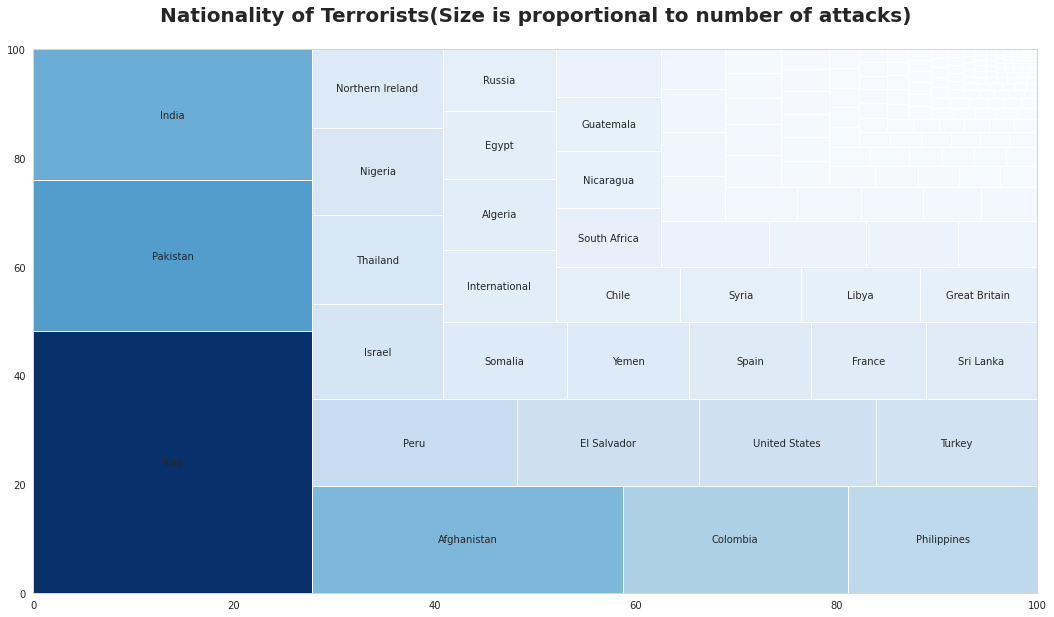

In [44]:
cmap = matplotlib.cm.Blues

df1 = df['Nationality'].value_counts()

mini=min(df1.values)
maxi=max(df1.values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df1.values]

squarify.plot(sizes=df1.tolist(), label=df1.index.tolist()[:30], color = colors)
plt.title('Nationality of Terrorists(Size is proportional to number of attacks)\n', weight='bold', fontsize = 20)
plt.show()

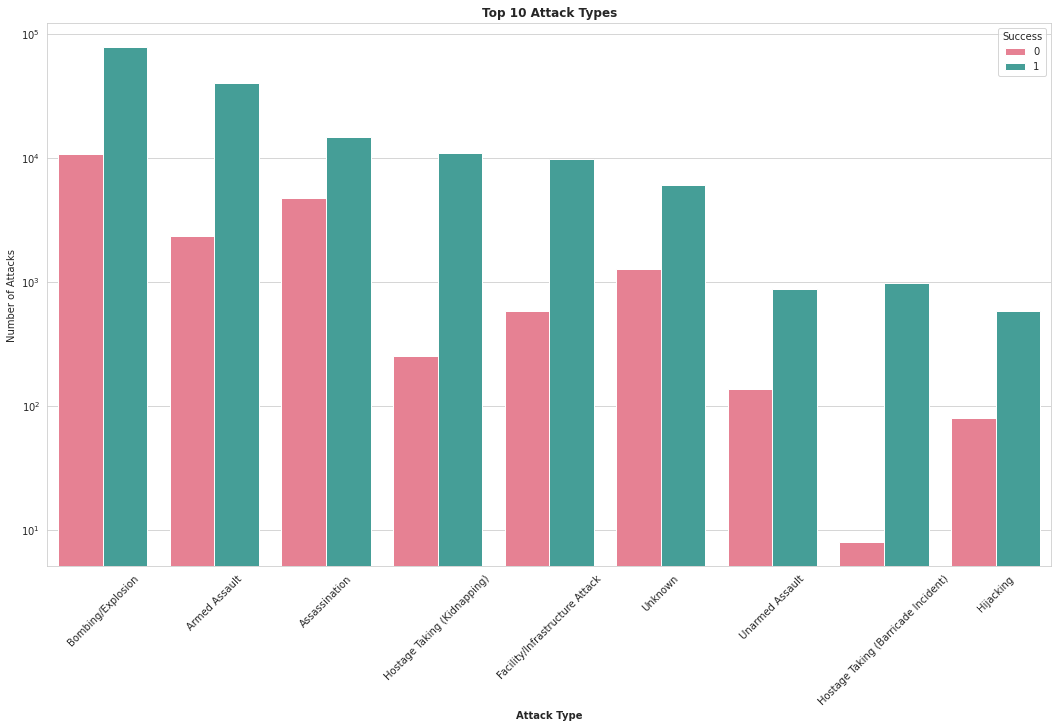

In [45]:
sns.countplot(x='AttackType', hue='success', data=df, order=df['AttackType'].value_counts().index, palette = 'husl')
plt.yscale('log')
plt.ylabel("Number of Attacks")
plt.xlabel("Attack Type", weight='bold')
plt.legend(title='Success')
plt.xticks(rotation=45)
plt.title('Top 10 Attack Types', weight='bold')
plt.show()

In [46]:
df_map = df[['latitude', 'longitude', 'State']]
df_map

,latitude,longitude,State
0,18.456792,-69.951164,NaN
1,19.371887,-99.086624,Federal
2,15.478598,120.599741,Tarlac
3,37.997490,23.762728,Attica
4,33.580412,130.396361,Fukouka
...,...,...,...
181686,2.359673,45.385034,Middle Shebelle
181687,35.407278,35.942679,Lattakia
181688,6.900742,124.437908,Maguindanao
181689,24.798346,93.940430,Manipur


In [47]:
reg_vals = df_map['State'].value_counts()
x = df_map['State'].value_counts().to_frame('Count').reset_index()

In [48]:
lop = x.merge(df_map, left_on = 'index', right_on = 'State')
lop = lop.drop('index', axis = 1)
lop

,Count,latitude,longitude,State
0,7645,33.303566,44.371773,Baghdad
1,7645,33.303566,44.371773,Baghdad
2,7645,33.303566,44.371773,Baghdad
3,7645,33.303566,44.371773,Baghdad
4,7645,33.303566,44.371773,Baghdad
...,...,...,...,...
181265,1,3.138943,101.691315,Federal Territory
181266,1,NaN,NaN,Topaz (Province)
181267,1,42.689047,21.063924,Obilic (Municipality)
181268,1,-8.872778,125.180000,East Timor (Region)


In [49]:
import folium
from folium.plugins import MarkerCluster

In [50]:
filt_year = df['Year'] ==1970
df_filt = df[filt_year]

In [51]:
reqFields = df_filt.loc[:,"city":"longitude"]
reqFields = reqFields.dropna()
reqFieldsLst = reqFields.values.tolist()

In [52]:
map = folium.Map(location=[0,30],tiles="CartoDB positron", zoom_start=2)

markerCluster = folium.plugins.MarkerCluster().add_to(map)
 
for point in range(len(reqFieldsLst)):
    folium.Marker(location=[reqFieldsLst[point][1],reqFieldsLst[point][2]],
                           popup=reqFieldsLst[point][0]).add_to(markerCluster)


In [53]:
map.save('plot_data.html')

In [54]:
from IPython.display import IFrame
from IPython.core.display import display

display(IFrame('plot_data.html','1200px', '800px'))


84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

**Conclusion and Results :****

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks:Middle East & North Africa

Year with the most attacks: 2014

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion